**Линейная корреляция** - это представление о линейной зависимости между данными. Обычно за пример берут рост и вес. Интуитивно понятно, что чем выше рост, тем больше у человека вес. То есть зависимость между двумя этими величинами **прямая**. Пример **обратной** зависимости: чем больше человек курит, тем меньше проживет. И, наконец, есть величины линейно **независимые** (одно растет, а другое нет). Причем линейность выражается в том, что точки массива как бы группируются вокруг невидимой прямой.

Но с примером про курение есть проблема. Медицина доказала, что продолжительность жизни снижается именно из-за курения. То есть между этими величинами есть причинно-следственная связь. (Человек больше курит, не потому что знает, что ему осталось жить все меньше. Хотя, возможно и такое бывает.) И это может сбивать с толку: линейная корреляция - это **не** про установление причинно-следственной связи. В случае с ростом и весом такую связь однозначно не установить:

*   мало ешь - меньше набираешь роста?
*   переедаешь - хуже растешь?
*   вырос, но вес не набрал - все в рост пошло?
*   и вырос, и потолстел - это вообще связанные процессы?

Так про что же линейная корреляция? Рассмотрим на примере датасета ирисов.

In [ ]:
# Импортируем ВСЁ :)
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy

In [ ]:
# Подгружаем ирисы.
iris = datasets.load_iris()

In [ ]:
# Сохраняем первый признак ирисов в иксы, а второй в игреки.
# Обратите внимание: мы взяли произвольно два признака.
# Влияет ли один на другой, как причина влияет на следствие,
# мы не знаем и знать не будем.
xs = [x[0] for x in iris.data[:100]]
ys = [x[1] for x in iris.data[:100]]

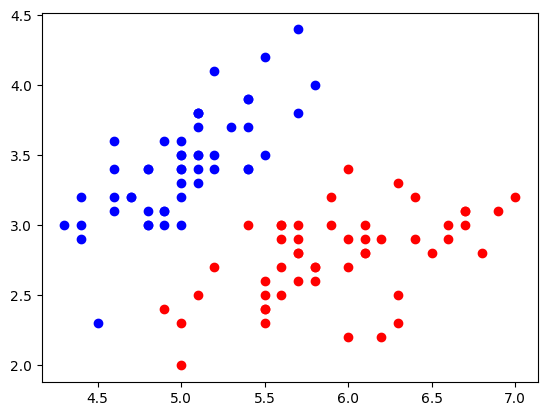

In [ ]:
# Тогда что же мы будем про них знать, благодаря коэффициенту
# линейной (именно линейной) корреляции. Мы будем знать,
# есть ли между ними линейная (именно линейная) зависимость.
plt.scatter(xs[:50], ys[:50],  color='blue')
plt.scatter(xs[50:], ys[50:],  color='red')

plt.show()

Линейная зависимость определяется через вопрос: прирастает ли Y, когда прирастает X?

Судя по графику выше, есть ощущение, что, чем больше X, тем больше Y. Массив как бы движется слева направо и снизу вверх. Если бы мы рассчитали функцию линейной регрессии, то ее коэффициент k был бы положительным. При этом у синих точек он был бы больше, чем у красных. Их массив как бы круче поднимается вверх.

Проверим отношение каждого *y* к каждому *x*. То есть для каждой точки найдем наклон прямой, которая проходит через точку 0 и эту точку массива. Наклон также называется тангенсом (в тригонометрии тангенс рассчитывается как отношение *y* к *x*), а в дифференциальном исчислении - касательной, которая показывает приращение функции. Его-то нам и нужно знать: приращение Y при приращении X.

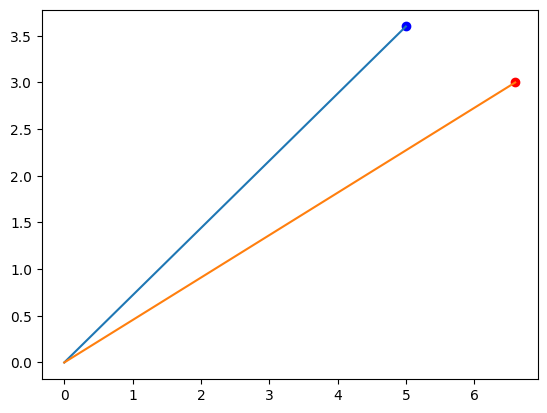

0.72 0.4545454545454546


In [ ]:
# Сначала давайте сравним два тангенса на примере двух случайных точек.
plt.scatter(xs[4], ys[4],  color='blue')
plt.plot((0, xs[4]), (0, ys[4]))
plt.scatter(xs[75], ys[75],  color='red')
plt.plot((0, xs[75]), (0, ys[75]))

plt.show()

print(ys[4]/xs[4], ys[75]/xs[75])
# У синей точки

In [ ]:
# Вы заметили, что у первой точки прямая круче? Будем считать, что в ее случае
# влияние на y сильнее. А теперь посчитаем средний наклон для двух массивов.
one_list = zip(ys, xs)
tangents = [i[0]/i[1] for i in one_list]
ave_tangent_1 = sum(tangents[:50])/50
ave_tangent_2 = sum(tangents[50:])/50
print(ave_tangent_1, ave_tangent_2)
# Реально, у первого массива Y прирастает быстрее. Но тут важный момент:
# это не значит, что именно X влияет на Y. Мы эти две величины
# произвольно выбрали как X и Y. Могли ведь и наоборот. Или вообще другие
# признаки взять.
# То есть приращение не означает причинно-следственную связь.

0.6842483184066873 0.46768035346395


Но таким прямым методом (в лоб, так сказать) не оценить направление корреляции (прямая, обратная). Мы сейчас использовали его для демонстрации на двух идеально подходящих наборах данных.

Оценить корреляцию помогает коэффициент, он же - коэффициент линейной корреляции. И тут есть интересный момент: корреляция - это точка зрения на данные, некий взгляд на то, насколько сильно они взаимосвязаны = сплочены вокруг прямой регрессии. Поэтому универсиального метода для ее оценки нет. Чаще всего используют три метода - по именам авторов:

*   Пирсона
*   Спирмена
*   Кендалла

Мы сегодня посмотрим на один - самый первый, а то тумач образования тоже не очень полезно для здоровья. Коэффициент Пирсона оценивает корреляцию по двум параметрам: [ковариация](https://en.wikipedia.org/wiki/Covariance) и [среднеквадратическое отклонение](https://en.wikipedia.org/wiki/Standard_deviation) - ссылки даю на англоязчные статьи, т.к. там есть визуал и разбор конкретных примеров. Ковариация отрицательная, если зависимость обратная; положительня при прямой зависимости и примерно равна нулю если зависимости нет. Среднеквадратическое отклонение тем больше, чем больше данные разбросаны вокруг среднего арифметического. Вообще этим двоим стоило бы посвятить отдельные посты, но надо делать тг-канал по "Введению в статистику". Я рекомендую пройти [базу по статистике на Академии Хана на английском](https://www.khanacademy.org/math/statistics-probability) - простой язык, есть субтитры, наглядность, примеры, понятные и простые задания. Хорошо учить - это тоже искусство!

In [ ]:
def covariance(xs, ys):
    average_x = sum(xs)/len(xs)
    E_of_xs = [(x_i - average_x) for x_i in xs]
    average_y = sum(ys)/len(ys)
    E_of_ys = [(y_i - average_y) for y_i in ys]
    E_of_xs_and_ys = zip(E_of_xs, E_of_ys)
    cov_x_y = sum([i[0] * i[1] for i in E_of_xs_and_ys])/len(xs)
    return cov_x_y

In [ ]:
def standard_deviation(xs):
    average_x = sum(xs)/len(xs)
    sigma = (sum([(x_i - average_x) ** 2 for x_i in xs])/len(xs)) ** 0.5
    return sigma

In [ ]:
# Рассчитаем коэффициент линейной корреляции Пирсона для первого вида ирисов.
# В числитиле у нас будет ковариация.
cov_x1 = covariance(xs[:50], ys[:50])
# В знаменателе: произведение среднеквадратического отклонения для X и Y.
sigma_x1 = standard_deviation(xs[:50])
sigma_y1 = standard_deviation(ys[:50])
# Вычисляем дробь.
coef_1 = cov_x1 / (sigma_x1 * sigma_y1)

In [ ]:
# Рассчитаем коэффициент линейной корреляции Пирсона для второго вида ирисов.
cov_x2 = covariance(xs[50:], ys[50:])
sigma_x2 = standard_deviation(xs[50:])
sigma_y2 = standard_deviation(ys[50:])
coef_2 = cov_x2 / (sigma_x2 * sigma_y2)

In [ ]:
# Вот такие коээфициенты у нас получились.
print(coef_1, coef_2)
# А теперь проверим их при помощи библиотеки scipy. Вроде все сходится, кроме
# округления, ну и ладно.
print(scipy.stats.pearsonr(xs[:50], ys[:50])[0],
      scipy.stats.pearsonr(xs[50:], ys[50:])[0])
# Собственно, как и визуальный анализ, коэффициент подтверждает, что у первого
# вида ирисов линейная зависимость выше. И у обоих видов она прямая.

0.7425466856651597 0.5259107172828243


Недостаток коэффициента Пирсона заключается в том, что из-за выбросов и шума в данных его разносит в разные стороны так, что он может вообще перестать указывать на линейную зависимость. Как с этим бороться? Убирать выбросы, чистить данные, использовать другие методы оценки. В здоровых данных здоровая линейная зависимость!

# Берегите себя и не курите!